In [9]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer

/usr/bin/sh: 1: pip: not found
/usr/bin/sh: 1: pip: not found
/usr/bin/sh: 1: pip: not found
/usr/bin/sh: 1: pip: not found
/usr/bin/sh: 1: pip: not found


### Build the `object-detection` pipeline using 🤗 Transformers Library

- This model was release with the paper [End-to-End Object Detection with Transformers](https://arxiv.org/abs/2005.12872) from Carion et al. (2020)

In [10]:
from helper import load_image_from_url, render_results_in_image

In [11]:
from transformers import pipeline

In [12]:
from transformers.utils import logging
logging.set_verbosity_error()

from helper import ignore_warnings
ignore_warnings()

In [13]:
od_pipe = pipeline("object-detection", "./models/facebook/detr-resnet-50")

Info about [facebook/detr-resnet-50](https://huggingface.co/facebook/detr-resnet-50)

### Use the Pipeline

In [14]:
from PIL import Image

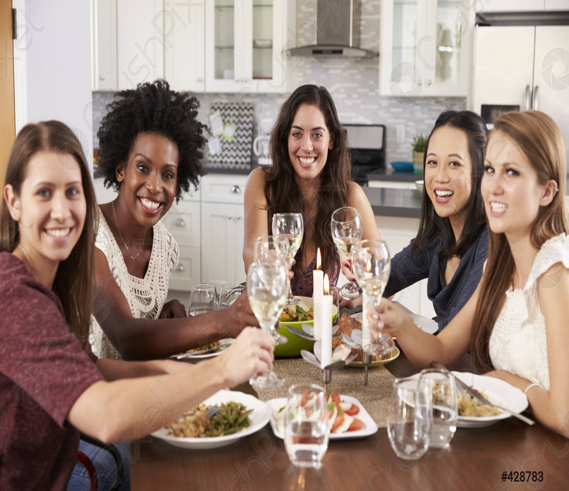

In [15]:
raw_image = Image.open('dinner.jpg')
raw_image.resize((569, 491))

In [16]:
pipeline_output = od_pipe(raw_image)

Return the results from the pipeline using the helper function `render_results_in_image`.

In [17]:
processed_image = render_results_in_image(
    raw_image, 
    pipeline_output)

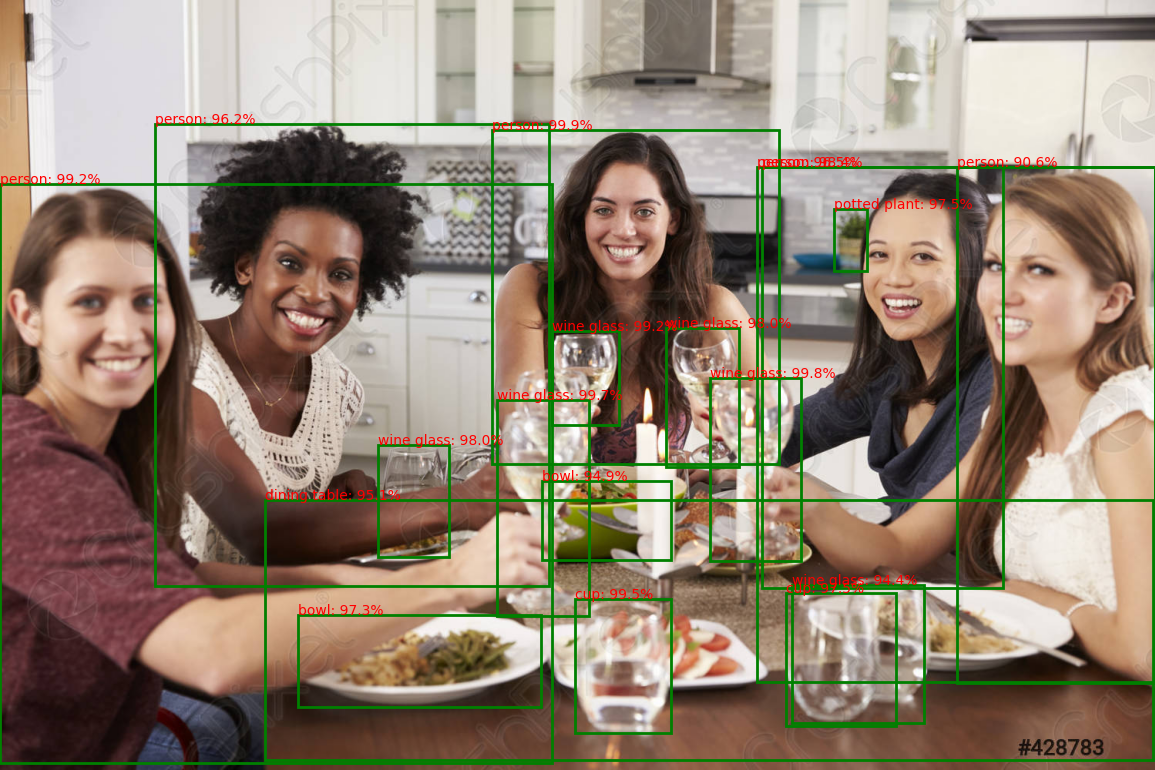

In [18]:
processed_image

The model has correctly predicted all the humans and with the bounding boxes we can see the confidence score.

### Using `Gradio` as a Simple Interface

- Use [Gradio](https://www.gradio.app) to create a demo for the object detection app.
- The demo makes it look friendly and easy to use.
- You can share the demo with your friends and colleagues as well.

In [19]:
import os
import gradio as gr

In [20]:
def get_pipeline_prediction(pil_image):
    
    pipeline_output = od_pipe(pil_image)
    
    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [21]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image", 
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

- `share=True` will provide an online link to access to the demo

In [22]:
demo.launch(share=True, server_port=int(os.environ['PORT1']))

Running on local URL:  https://0.0.0.0:23734
Running on public URL: https://6f255fcfa835a6608f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [23]:
demo.close()

Closing server running on port: 23734


### Make an AI Powered Audio Assistant

- Combine the object detector with a text-to-speech model that will help dictate what is inside the image.

- Inspect the output of the object detection pipeline.

In [24]:
pipeline_output

[{'score': 0.9732624888420105,
  'label': 'bowl',
  'box': {'xmin': 386, 'ymin': 798, 'xmax': 702, 'ymax': 918}},
 {'score': 0.9917861819267273,
  'label': 'wine glass',
  'box': {'xmin': 716, 'ymin': 430, 'xmax': 804, 'ymax': 551}},
 {'score': 0.9492066502571106,
  'label': 'bowl',
  'box': {'xmin': 704, 'ymin': 624, 'xmax': 871, 'ymax': 727}},
 {'score': 0.9747188687324524,
  'label': 'cup',
  'box': {'xmin': 1020, 'ymin': 769, 'xmax': 1163, 'ymax': 942}},
 {'score': 0.9651932120323181,
  'label': 'person',
  'box': {'xmin': 983, 'ymin': 216, 'xmax': 1499, 'ymax': 885}},
 {'score': 0.9443745613098145,
  'label': 'wine glass',
  'box': {'xmin': 1028, 'ymin': 759, 'xmax': 1199, 'ymax': 938}},
 {'score': 0.9059509038925171,
  'label': 'person',
  'box': {'xmin': 1243, 'ymin': 217, 'xmax': 1499, 'ymax': 887}},
 {'score': 0.9795597791671753,
  'label': 'wine glass',
  'box': {'xmin': 490, 'ymin': 578, 'xmax': 582, 'ymax': 723}},
 {'score': 0.9617024064064026,
  'label': 'person',
  'box':

The output of the pipeline is an array of dictionaries, each dictionary corresponds to one bounding box including its label and confidence score. So if we can a simple method that processes this array and returns a string of the summary of what's in the image.

In [25]:
od_pipe

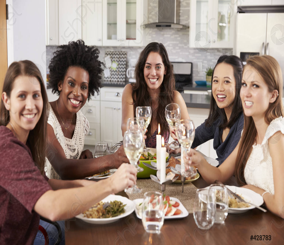

In [26]:
raw_image = Image.open('dinner.jpg')
raw_image.resize((284, 245))

In [27]:
from helper import summarize_predictions_natural_language

In [28]:
text = summarize_predictions_natural_language(pipeline_output)

In [29]:
text

'In this image, there are two bowls six wine glasss two cups six persons one potted plant and one dining table.'

### Generate Audio Narration of an Image

In [30]:
tts_pipe = pipeline("text-to-speech",
                    model="./models/kakao-enterprise/vits-ljs")

More info about [kakao-enterprise/vits-ljs](https://huggingface.co/kakao-enterprise/vits-ljs).

In [31]:
narrated_text = tts_pipe(text)

### Play the Generated Audio

In [32]:
from IPython.display import Audio as IPythonAudio

In [33]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])